# Bias and Variance: Why Models Fail
### `! git clone https://www.github.com/ds4e/bias_and_variance`

## Bias and Variance
- Today we're going to formalize some intuitions that have come up many times during class
- Why does there seem to be a trade-off between parsimony and verisimilitude when we pick hyperparameters or do model selection?
- The word "bias" gets abused regularly, but today we mean it in the strict statistical sense: That there is a real parameter out there called $b_0$, and our estimate $\hat{b}_0$ is off the mark, even as we accumulate lots of observations
- We are going to pick on linear models because we can clearly illustrate importance principles with them, but these are issues for every model (trees, neural nets, etc.)
- I think these are the most important lessons anyone working with data can learn, but particularly people working with non-experimental/administrative/observational data can learn

## Linear Model Review
- We have a relationship between an outcome $y$ and feature/explanatory/predictor variables $x$,
$$
y_i = x_i \cdot b = \underbrace{b_0}_{\text{Constant/Intercept}} + \sum_{k=1}^L \underbrace{b_k}_{\text{Slope}} x_{ik}
$$
- The coefficients/weights are typically chosen to minimize the *Sum of Squared Error*,
$$
\text{SSE}(b) = \sum_{i=1}^N \left( y_i - b \cdot x_i \right)^2
$$
- The optimal $b$ is called the *Ordinary Least Squares* or OLS estimator ($\hat{b} = (X'X)^{-1}(X'y)$)

## Underfitting and Overfitting
- What happens when we use "too few" or "too many" variables in building a linear model?
- In the case of linear models, we can explore the consequences of ommitting variables that should arguably be in the model (underfitting) and adding too many variable (overfitting)
    - Underfitting: When we leave out variables, we get a phenomenon called **omitted variables bias**, where the coefficients in the model adjust to compensate for missing variables
    - Overfitting: When we include too many variables, we get a phenomenon called **multicolinearity**, where the variables are competing to explain the same variation in $y$ and "get in each other's way," resulting in a low quality model
- When you exclude a variable from your model, it doesn't simply disappear from reality: Its influence is simply picked up by other variables that are in your model

# Threat 1: Omitted Variables Bias

## Bias
- Suppose there is some true parameter $b_0$ out there, and we are trying to estimate it
- To understand what follows, it helps to precisely distinguish a few concepts:
    - $\hat{b}$ is an **unbiased estimator** of the true $b_0$ if $\mathbb{E}_D[\hat{b}(D)] = b_0$, so we expect our estimator to be the true value before the data are gathered. Otherwise, it is **biased**.
    - $\hat{b}$ is a **consistent estimator** of the true $b_0$ is $\hat{b}(D_n)$ converges to $b_0$ in probability, in the sense of the weak law of large numbers ($pr_N[|\hat{b}(D_N)-b_0| > d]$ goes to zero as $N$ gets large). Otherwise, it is **inconsistent**.
- A consistent estimator can be biased, but we get closer and closer to the truth as the sample size gets large -- This is the foundation of a lot of statistical thinking
- What we'll see is that, if you omit relevant variables from your model, your estimates and predictions won't even be consistent: As the sample size gets large, you end up with systematic deviations from the truth

## Omitting Variables
- What happens when you move variables in and out of a regression?
- Suppose there's a "true model":
$$
y_i = b_0 + b_1 x_{i1} + b_2 x_{i2} + \varepsilon_i$$
where $\text{cov}(\varepsilon_i,x_{i1})=0$ and $\text{cov}(\varepsilon_i,x_{i2})=0$; the regressors are "exogenous" or "pre-determined"
- If the the two variables $x_1$ and $x_2$ are correlated, they are competing to explain some of the same variation in $y$; in principle, if you drop one, the other should become a stronger predictor -- this is the story that is often told about regression
- But if you drop one of the variables, say $x_2$, you introduce *bias* in the estimation of $b_1$: The model will incorrectly attribute to $x_1$ some of the effect of $x_2$, in proportion to their covariance

## Omitted Variables Bias
- But if you regress $y$ on $x_1$ alone, the OLS coefficient is (recall the EDA homework question on covariance)
\begin{alignat*}{2}
\hat{b}_1 &=& \dfrac{\text{cov}(y,x_1)}{\text{var}(x_1)} \\
&=& \dfrac{\text{cov}(b_0 + b_1 x_1 + b_2 x_2+\varepsilon,x_1)}{\text{var}(x_1)} \\
&=& \dfrac{b_1 \text{cov}(x_1,x_1) + b_2 \text{cov}(x_2,x_1)+\text{cov}(\varepsilon,x_1)}{\text{var}(x_1)} \\
&=& b_1 \underbrace{\dfrac{\text{cov}(x_1,x_1)}{\text{var}(x_1)}}_{=1} + b_2 \dfrac{\text{cov}(x_2,x_1) }{\text{var}(x_1)}+ \underbrace{\dfrac{\text{cov}(\varepsilon,x_1)}{\text{var}(x_1)}}_{=0}
\end{alignat*}

## Omitted Variables Bias
- So we end up with:
$$
\hat{b}_1 = \underbrace{ b_1 }_{\text{``True'' $b_1$ weight}} + \underbrace{b_2}_{\text{``True'' $b_2$ weight}} \quad \underbrace{ \dfrac{ \text{cov}(x_2, x_1) }{ \text{var}(x_1)} }_{\text{Regression weight of $x_2$ on $x_1$}}
$$
When you drop $x_2$, $x_1$ indirectly picks up exactly the variation in $y$ that is explained by a regression of $x_1$ on $x_2$. The bias of the OLS estimator with omitted variables is
$$
\hat{b}_1 - b_1 = b_2\dfrac{\text{cov}(x_2, x_1) }{ \text{var}(x_1)}
$$
which is only equal to zero if $\text{cov}(x_2, x_1) = 0$, which is highly unlikely.
- This is often summarized as "correlation is not causation": Regression estimates can rarely be interpreted in a causal sense
- If $\text{cov}(x_1,x_2)=0$, there is no OVB problem because the variables are uncorrelated
- OLS is brilliant: It automatically detects $x_2$'s influence on $y$ through $x_1$, **even if you don't even know $x_2$ exists**
- I cheated a bit and evaluated things asymptotically/for large samples: This bias doesn't go away as your sample size increases, it is always there

[Text(0.5, 1.0, 'The features/covariates'),
 Text(0.5, 0, 'x_1'),
 Text(0, 0.5, 'x_2')]

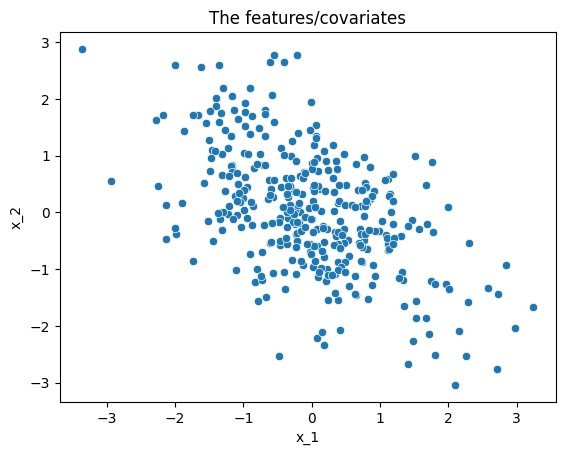

In [ ]:
# Quick OVB Laboratory
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

N = 350
K = 2
rho = -.5
mean = [0, 0]
cov = [[1, rho], [rho, 1]]
x1, x2 = np.random.default_rng().multivariate_normal(mean, cov, N).T
sns.scatterplot(x=x1,y=x2).set(title='The features/covariates', xlabel = 'x_1', ylabel = 'x_2')

In [ ]:
beta0 = np.array([8,4,2]) # True coefficients
sigma =2 # Irreducible noise parameter
eps = np.random.default_rng().normal(0, sigma, N).T # Generate shocks
X = pd.DataFrame({'Intercept':np.ones(N), 'x1':x1, 'x2':x2}) # Data frame
y = X @ beta0 + eps # Target variable

In [ ]:
from sklearn.linear_model import LinearRegression # Import linear regression model
reg = LinearRegression(fit_intercept=False).fit(X, y) # Fit the linear model
rdf = pd.DataFrame({'variable': X.columns, 'slope':reg.coef_})
print('Full information regression: \n')
rdf

Full information regression: 



,variable,slope
0,Intercept,8.108382
1,x1,3.918879
2,x2,2.223811


In [ ]:
from sklearn.linear_model import LinearRegression # Import linear regression model
Z = pd.DataFrame({'Intercept':np.ones(N), 'x1':x1}) # Data frame
reg_ovb = LinearRegression(fit_intercept=False).fit(Z, y) # Fit the linear model
print('Regression with x_2 omitted: \n')
rdf = pd.DataFrame({'variable': Z.columns, 'slope':reg_ovb.coef_})
rdf

Regression with x_2 omitted: 



,variable,slope
0,Intercept,8.119516
1,x1,2.693952


In [ ]:
# Regress x2 on x1:
VCV = X.loc[:,['x1','x2']].cov()
reg_x2_x1 = VCV.iloc[0,1]/VCV.iloc[0,0]

# Compute OVB:
print('Sample bias: ', reg.coef_[1] + reg.coef_[2]*reg_x2_x1) # Small sample biased coefficient
print('Asymptotic bias: ', beta0[1] + beta0[2]*rho) # Theoretical OVB coefficient value

Sample bias:  2.6939522695184825
Asymptotic bias:  3.0


## Omitted Variables Bias
- From the formula, you can tell which way the bias goes from $\text{cov}(x_1,x_2)$ and $b_2$:
  - $\hat{b}_1$ is biased up if $\text{cov}(x_1,x_2)>0$ and $b_2>0$ or both negative
  - $\hat{b}_1$ is biased down if $\text{cov}(x_1,x_2)<0$ and $b_2>0$ or vice versa
- This can be a helpful check for your intuition when you see unexpected coefficient signs: It could the coefficient, or the covariance
- Because of OVB, I can make it look like $x_1$ has a positive effect on $y$, no effect on $y$, or a negative effect on $y$ **only by varying the correlation between the observed variable $x_1$ and unobserved variable $x_2$**:

In [ ]:
from sklearn.linear_model import LinearRegression # Import linear regression model


def ovb_prediction(rho, b_1, b_2):
    N = 350
    K = 2
    #rho = .9
    mean = [0, 0]
    cov = [[1, rho], [rho, 1]]
    x1, x2 = np.random.default_rng().multivariate_normal(mean, cov, N).T

    beta0 = np.array([8,b_1,b_2]) # True coefficients
    sigma =2 # Irreducible noise parameter
    eps = np.random.default_rng().normal(0, sigma, N).T # Generate shocks
    X = pd.DataFrame({'Intercept':np.ones(N), 'x1':x1, 'x2':x2}) # Data frame
    y = X @ beta0 + eps # Target variable

    reg_FI = LinearRegression(fit_intercept=False).fit(X, y) # Fit the linear model
    reg_OVB = LinearRegression(fit_intercept=False).fit(X.drop(['x2'],axis=1), y) # Fit the linear model

    y_FI = reg_FI.coef_[0] + reg_FI.coef_[1] * X['x1'] + reg_FI.coef_[2] * np.mean(X['x2'])
    y_OVB = reg_OVB.coef_[0] + reg_OVB.coef_[1] * X['x1']

    title_str = ' r: ' + str(rho) + ', b_1: ' + str(b_1) + ', b_2: ' + str(b_2)

    sns.scatterplot(x = X['x1'], y = y_FI, label = 'Full Information').set(title = title_str, xlabel = '$x_1$', ylabel = '$\\hat{y}$')
    sns.scatterplot(x = X['x1'], y = y_OVB, label = 'With OVB')


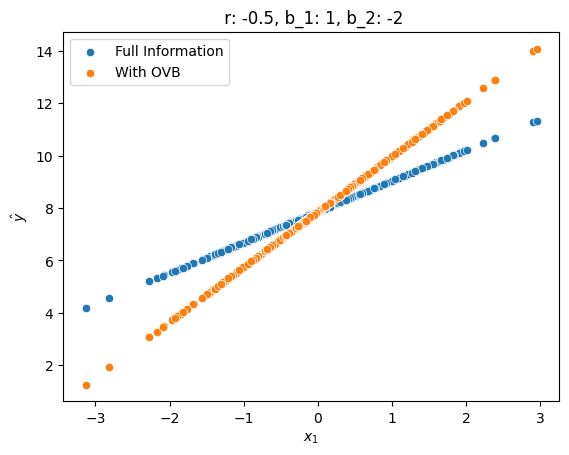

In [ ]:
ovb_prediction(-.5, 1,-2)

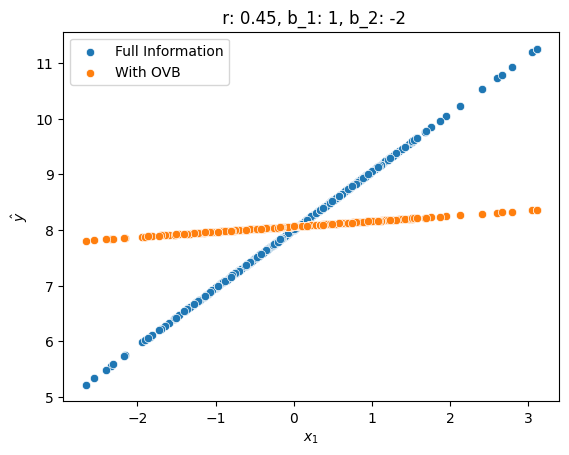

In [ ]:
ovb_prediction(.45, 1,-2)

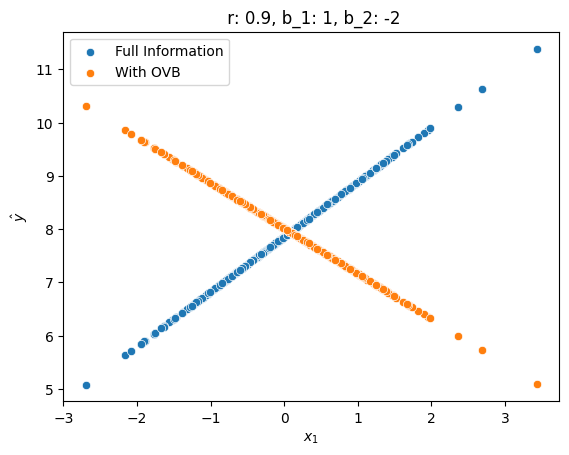

In [ ]:
ovb_prediction(.9, 1,-2)

- By tinkering with $r$ and $b_2$, I can get essentially any result for the OVB regression line
- Just because you are not interested in a variable does not mean it is not interested in you

## Examples of Omitted Variables Bias
- Why can't health studies provide basic answers to fundamental questions?
    - Are eggs good for you or not?
    - What's the causal effect of drinking/smoking/exercise/elective procedures?
    - "Married people earn higher wages"
    - People buy more luxury goods when the price goes up
    - "People who eat ice cream live longer."
    - Does college raise wages?
    - Does using drugs like cannabis cause mental illness?
- A lot of "research" is industrialized confirmation bias, which churns out badly estimated correlations and calls it "science"
- This is a big part of the replication crisis
- Notice that if you were to "act" on these findings, you could make the situation much worse

## Prediction Bias
- If your coefficients are biased, of course your predictions must be biased
- Suppose you estimated $(\hat{b}_0, \hat{b}_1)$ but omitted $x_2$, so your coefficients are biased
- Let's make a prediction for an observed $\tilde{x}_1$ with $\tilde{x}_2$ unobserved:
$$
\begin{alignat*}{2}
\hat{y}(\tilde{x}) &=& \tilde{x}_1 \hat{b}_1 + \hat{b}_0 \\
&=& \tilde{x}_1 \left(  b_1  + b_2 \dfrac{\text{cov}(X_2, X_1)}{s_1^2}  \right)  + \left( b_0 - \dfrac{\text{cov}(X_2, X_1)}{s_1^2}\bar{x}_1\right) \\
&=& b_0 + \tilde{x}_1   b_1 + \tilde{x}_1  b_2 \dfrac{\text{cov}(X_2, X_1)}{s_1^2} - \dfrac{\text{cov}(X_2, X_1)}{s_1^2}\bar{x}_1
\end{alignat*}
$$

- What's the bias? We'll subtract the true conditional expectation function $y(\tilde{x}) = b_0 + b_1 \tilde{x}_1 + b_2 \tilde{x}_2$ from our prediction:
$$
\begin{alignat*}{2}
\hat{y}(\tilde{x}) - y(\tilde{x})&=&   b_2 \left( \tilde{x}_1  \dfrac{\text{cov}(X_2, X_1)}{s_1^2} - \tilde{x}_2\right) - \dfrac{\text{cov}(X_2, X_1)}{s_1^2}\bar{x}_1
\end{alignat*}
$$
- So the bias is roughly our attempt to predict $\tilde{x}_2$ from $\tilde{x}_1$ and our data times $b_2$, plus the bias in the intercept of the regression
- This is very intuitive: The prediction is correct for the data we do have, and otherwise OLS does its best using the data it has to predict the data it doesn't have

## Prediction Bias
- This is important:
    - What happens when we include demographic variables like race, SOGI, education, nationality, SDOH, etc.? What do those dummy coefficients do?
    - For that matter, can we truly interpret any coefficient that comes out of a regression as being an "effect" rather than just a correlation?
    - Does this also impact non-linear models? (Of course it does, the math is just much more complex)
    - But conversely, if we fail to control for variables like race, SOGI, education, nationality, SDOH, etc., what happens to our predictions?
- This is a complex statistical and ethical issue: Simply removing, for example, race from your model does not necessarily make your model "unbiased" or "fair". In fact, if race is highly correlated with unobserved variables that impact, say, health, removing race might doom members of a sensitive group to worse health outcomes by depriving the model of data that is correlated with unobservables (e.g. education might be unavailable, but correlated with race because of historical/structural inequalities and racism: By removing race, the model now cannot indirectly control for education. Education might be crucial for understanding health outcomes.)
- There is no magic procedure to exorcise a model of its demons and make it virtuous

# **Correlation is not causation**

- It is not a slogan or vibe: It is a mathematical reality of great significance

## Causal Inference
- What if you really care about the value of a model coefficient?
- There is a field of estimation and inference called **causal inference**
- It starts from the perspective of an ideal experiment, and then investigates what kinds of data and statistical procedures allow you to get credible estimates of the impact of a particular variable (e.g. difference-in-differences, propensity score matching, regression discontinuity design, instrumental variables, causal random forests)
- This is not popular in data science because it is often very difficult, and difficult to evaluate whether "it works" or not
- Epidemiologists, bio-statisticians, and economists take this seriously

## (Natural/Quasi-) Experiments and Causal Inference
- A lot of fields resolve this dilemma by only study pre-registered randomized experiments (e.g. epidemiology, medicine)
- This is good when done right, but didn't stop the replication crisis because that community of researchers wasn't doing science (they didn't follow vague pre-analysis plans)
- Some fields allow for "natural experiments" in which randomization occurs as a result of conditions beyond the control of the people in the situation (e.g. public health, social science)
- Some examples, just to get an idea of what an identification strategy sounds like:
    - Difference-in-differences/two-way fixed effects (TWFE): Use variation in space or time to first remove systematic differences between observational units, then difference again to get the effect of treatment
    - Regression Discontinuity: Find a "cutoff" where treatment begins as a function of observables, and compare observations just above the cutoff (treatment) to observations just below (control)
    - Propensity Score Matching: "Match" treated and untreated observations, and then look at average differences between groups
    - Instrumental Variables: Find a "natural experiment" that shifts the likelihood of treatment, and use predicted treatment rather than actual treatment as a regressor

# Threat 2: Multicolinearity

## Multicolinearity
- The natural response is, "OK, then we should include all the possible explanatory variables to avoid OVB?"
- Unfortunately, it's not that simple: Even if you had all the variables you might want (you never do; e.g. ability, determination, self-control, etc.), there's an infinte number of ways to expand/combine them, and this often leads to a statistical phenomenon called "multicolinearity"
- We have seen this before: Include too many polynomial powers of your explanatory variables, and your $R^2$ on the test set goes negative
- If some set of variables are correlated, they co-explain each other and the outcome --- the "partialing out" process reduces the explanatory power of each, since there's only so much variation in $y$ to explain with a limited number of $N$ observations
- Remember the OLS coefficient $b_k$ is as if you regressed each of $y$ and $x_k$ on all of the other variables, and then regressed the residuals of $y$ and $x_k$ on one another
- If two explanatory/feature variables are highly correlated, they "get in each other's way" in trying to explain the data: Coefficients become noisily estimated, predictions become highly variable, and regressions become statistically insignificant

## An Example of Multicolinearity

<div>
<img src="https://github.com/ds4e/bias_and_variance/blob/main/src/table.png?raw=1" width="700"/>
</div>

## Multicolinearity
- This is called **multi-colinearity** --- a "kitchen sink" model will probably not only be biased, but perform badly in every other sense we care about
- It's not uncommon that when you add a variable, suddenly a bunch of other variables become smaller and statistically insignificant, or even reverse sign
- If you've moved variables in and out of a regression and felt like the results made no sense, it was probably because of this phenomenon
- This creates a dilemma/trade-off: OVB on the one hand (bias, underfit models), potential multi-colinearity on the other (high variance, overfit models)
- The practice of data science is partly about exploring the trade-off between the two
- These are considerations for all our predictive analytics tools, not just linear models

## Multicolinearity in the Large: Needles in a Haystack
- What if we have lots of covariates and they are moderately correlated?
- In most situations, we have hundreds or thousands or millions of variables at our disposal
- Typically, they are correlated with one another and with the target/outcome variable, $y$
- Which should we use? Shouldn't we just use all of them, and let Python sort it out?

- In reality, we rarely know exactly which variables directly impact $Y$ and how, and which don't
- Let's model this situation by selecting some variables at random to be "needles" that do directly impact $y$, and the rest are "hay" that do not directly impact $y$, but they are all correlated so it is difficult to detect needles versus hay.
- So the model is $y = x \cdot b + \varepsilon$, but the coefficient $b_{\ell}$ for variable $\ell$ is either $0$ or $1$
- If the needle probability is .3 and 30% of features/explanatory variables are actually in the model, things are OK:

0.28150098491574416


<Axes: ylabel='Density'>

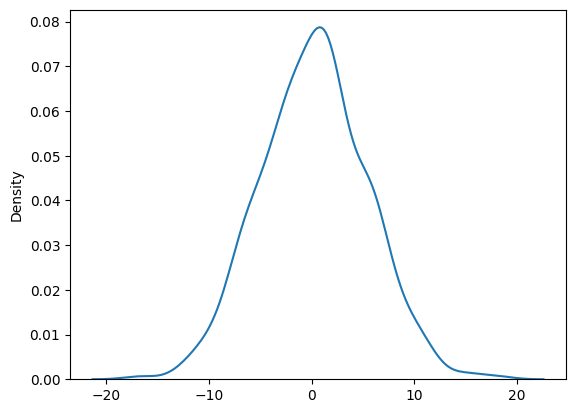

In [ ]:
from sklearn.linear_model import LinearRegression # Import linear regression model
from sklearn.model_selection import train_test_split # Import tts

N = 500
K = 400
mean = np.zeros(K)
sigma = 2 # Irreducible noise parameter
rho = .7 #.7
cov = np.ones((K,K))*rho
for k in range(K):
    cov[k,k]=1

needles = ( np.random.default_rng().uniform(0,1,K)>.8 ).astype(int)
beta0 = 1.0*needles # True coefficients

X = np.random.default_rng().multivariate_normal(mean, cov, N)
eps = np.random.default_rng().normal(0, sigma, N).T # Generate shocks
sigma = 2 # Irreducible noise parameter
y = 1 + X @ beta0 + sigma * eps

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=100)

reg = LinearRegression().fit(X_train, y_train) # Fit the linear model
print(reg.score(X_test,y_test))

sns.kdeplot(reg.coef_)

- If the needle probability goes down to .1, though:

-4.411883708406034


<Axes: ylabel='Density'>

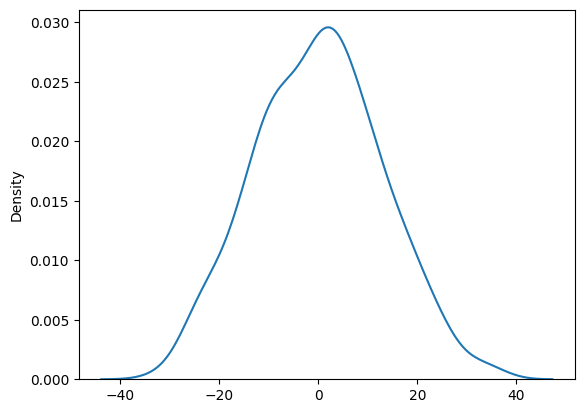

In [ ]:
from sklearn.linear_model import LinearRegression # Import linear regression model
from sklearn.model_selection import train_test_split # Import tts

N = 500
K = 400
mean = np.zeros(K)
sigma = 2 # Irreducible noise parameter
rho = .9 #.7
cov = np.ones((K,K))*rho
for k in range(K):
    cov[k,k]=1

needles = ( np.random.default_rng().uniform(0,1,K)>.9 ).astype(int)
beta0 = 1.0*needles # True coefficients

X = np.random.default_rng().multivariate_normal(mean, cov, N)
eps = np.random.default_rng().normal(0, sigma, N).T # Generate shocks
sigma = 2 # Irreducible noise parameter
y = 1 + X @ beta0 + sigma * eps

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=100)

reg = LinearRegression().fit(X_train, y_train) # Fit the linear model
print(reg.score(X_test,y_test))

sns.kdeplot(reg.coef_)
# coefs.append(reg.coef_)

# gdf = pd.DataFrame(coefs)
# sns.lineplot( y=gdf[0], x= rho_grid)
# sns.lineplot( y=gdf[1], x= rho_grid)
# sns.lineplot( y=gdf[2], x= rho_grid)
# plt.show()

- Yikes, negative $R^2$ on the test set
- Even though the "true" variables are in the haystack, the model is not finding them
- Why? There's only so much variation in $Y$ to explain in a finite data set, and the covariates/features are getting in each other's way
- Let's vary the proportion of needles from 20% to 100% of the stack, to see the phenomenon in action

Maximum R2:  0.5214775462317713


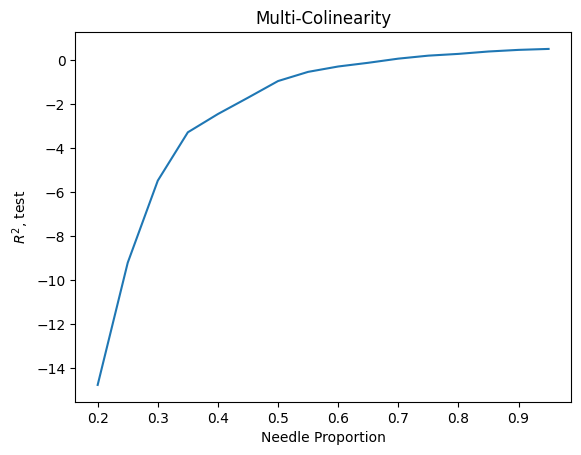

In [ ]:
from sklearn.linear_model import LinearRegression # Import linear regression model
from sklearn.model_selection import train_test_split # Import tts

N = 500
K = 400
mean = np.zeros(K)
sigma = 2 # Irreducible noise parameter
rho = 0.5 #.7
cov = np.ones((K,K))*rho
for k in range(K):
    cov[k,k]=1
X = np.random.default_rng(100).multivariate_normal(mean, cov, N)
eps = np.random.default_rng(100).normal(0, sigma, N).T # Generate shocks
sigma = 2 # Irreducible noise parameter

def multico(needle_proportion):
    needles = ( np.random.default_rng(500).uniform(0,1,K) < needle_proportion ).astype(int)
    beta0 = 1.0*needles # True coefficients
    y = 1 + X @ beta0 + sigma * eps
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=100)
    reg = LinearRegression().fit(X_train, y_train) # Fit the linear model
    rsq = reg.score(X_test,y_test)
    return rsq

rsq = []
for needle_pr in np.arange(0.2,1,.05):
    rsq.append( multico(needle_pr) )

sns.lineplot(x = np.arange(0.2,1,.05), y = rsq).set(title='Multi-Colinearity', xlabel='Needle Proportion', ylabel='$R^2$, test')

print('Maximum R2: ', np.max(rsq))


- The "kitchen sink" approach is not going to work: All of the covariates/features are correlated with each other and with $y$, and yet we end up with garbage until sufficiently many variables are needles in the haystack
- Mere positive correlation isn't enough for the inclusion of a variable to be useful
- Let me show you something surprising: Just randomly sampling a subset of the variables can do much better
- I'll run the regression on 20% of the covariates/features, **choosing them at random**

Initial R2, simple:  0.9232491035544386
Initial R2, full:  -14.751947887011424

Maximum R2, simple:  0.9977638351051882
Maximum R2, full:  0.5214775462317713


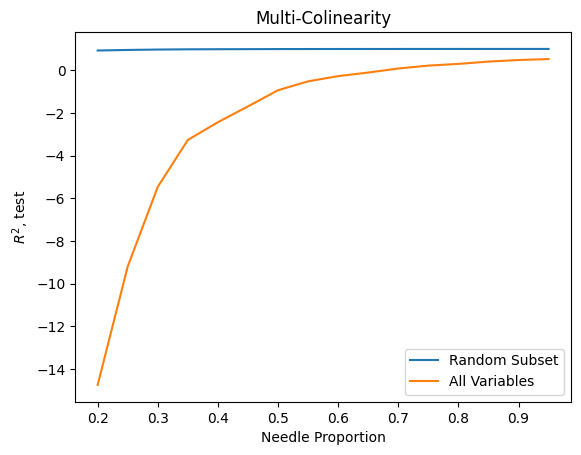

In [ ]:
from sklearn.linear_model import LinearRegression # Import linear regression model
from sklearn.model_selection import train_test_split # Import tts

N = 500
K = 400
mean = np.zeros(K)
sigma = 2 # Irreducible noise parameter
rho = 0.5 #.7
cov = np.ones((K,K))*rho
for k in range(K):
    cov[k,k]=1
X = np.random.default_rng(100).multivariate_normal(mean, cov, N)
eps = np.random.default_rng(100).normal(0, sigma, N).T # Generate shocks
sigma = 2 # Irreducible noise parameter
keep = .2 # Randomly sample covariates/features

def multico(needle_proportion):
    needles = ( np.random.default_rng(500).uniform(0,1,K) < needle_proportion ).astype(int)
    beta0 = 1.0*needles # True coefficients
    y = 1 + X @ beta0 + sigma * eps
    X_sampled = X[:, np.random.default_rng(600).uniform(0,1,K) < keep  ]
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=100)
    reg = LinearRegression().fit(X_train, y_train) # Fit the linear model
    rsq = reg.score(X_test,y_test)
    return rsq

rsq_simple = []
for needle_pr in np.arange(0.2,1,.05):
    rsq_simple.append( multico(needle_pr) )

sns.lineplot(x = np.arange(0.2,1,.05), y = rsq_simple, label = 'Random Subset' ).set(title='Multi-Colinearity', xlabel='Needle Proportion', ylabel='$R^2$, test')
sns.lineplot(x = np.arange(0.2,1,.05), y = rsq, label = 'All Variables' )


print('Initial R2, simple: ', rsq_simple[0])
print('Initial R2, full: ', rsq[0])

print('\nMaximum R2, simple: ', np.max(rsq_simple))
print('Maximum R2, full: ', np.max(rsq))


## Simple Models (even random!) Can Beat Complex Ones
- Notice, the simple models have an $R^2$ over .9, even when hay is much more likely than needs (around .3)
- Even though the "simple" model is randomly sampling covariates/features to include, it significantly outperforms using all of the variables
- Even for only 20% of the variables selected at random, the $R^2$ is still greater than .5, while it's negative when all variables are included
- Indeed, it gets close to 1 as the needle proportion gets close to 1, while the $R^2$ for the entire set of features approaches .5
- Random feature selection has a name: The **random subspace method**, and it's used in Random Forests, in particular
- This is why statistics and machine learning even exist, in a lot of ways: Learning from data is very difficult

# The Bias-Variance Trade-Off

## The Bias-Variance Trade-Off
- Can we talk about these results more generally, without focusing so much on the linear model? What is the general phenomenon that we're discovering?
- For prediction, the previous issues (ovb as bias, multi-colinearity as model variance) come to a head in the **bias-variance trade-off**
- As you might have suspected, you can't solve both simultaneously:
    - If you have a simple model, it will have relatively high bias but relatively low variance
    - If you have a complex model, it will have relatively low bias but relatively high variance
    - To build a good model, you have to trade off bias (which favors complex models) with variance (which favors simple ones)
- The is a core issue of the practice of machine learning and prediction: Striking a balance between parsimony (simple models that are easily understood) and verisimilitude (complex models that mirror various features of reality)
- Let's make this concept precise

## The Bias-Variance Trade-Off
- Imagine there's a true model, $y = f(x) + \varepsilon$, where the expected value of $\varepsilon$ is zero, so $\mathbb{E}_\varepsilon[\varepsilon]=0$, and $\mathbb{E}_\varepsilon[\varepsilon^2]=\sigma^2$
- We have a model $\hat{f}(x,D) = \hat{y}$, that depends on data $D=(X,y)$
- There are a few quantities of interest:
  - The predictor bias, $\mathbb{E}_{D}[ f(x) - \hat{f}(x,D)]$: How wrong the model is, on average; expected error
  - The predictor variance, $\mathbb{E}_{D}[(\hat{f}(x,D) - \mathbb{E}_D[\hat{f}(x,D)])^2]$: How noisy our predictions are; expected predictor variance
  - The irreducible variance, $\mathbb{E}_{\varepsilon}[\varepsilon^2]=\sigma^2$: How noisy the prediction environment is
- We want to study the **expected prediction error** at $x$: $$ \mathbb{E}_{D,\varepsilon}[(y-\hat{f}(x,D))^2]$$

## Bias-Variance Trade-Off: The Picture
<div>
<img src="https://github.com/ds4e/bias_and_variance/blob/main/src/bvt.png?raw=1" width="700"/>
</div>

## Bias-Variance Trade-off: The Math
- The surprising fact is that all these quantities --- predictor bias, predictor variance, and irreducible variance --- are related to the expected prediction error at $x$:
\begin{alignat*}{2}
\mathbb{E}_{D,\varepsilon}[(y-\hat{f}(x,D))^2] &=& \mathbb{E}_{D,\varepsilon}[(f(x)+\varepsilon-\hat{f}(x,D))^2] \\
&=& \mathbb{E}_{D,\varepsilon}\left[f(x)^2-2f(x)\hat{f}(x,D)+\varepsilon^2 +\hat{f}(x,D)^2 \right. \\
&& \left. + 2f(x)\varepsilon-2\varepsilon\hat{f}(x,D) \right]\\
&=& f(x)^2-2f(x)\mathbb{E}_{D}[\hat{f}(x,D)] +\mathbb{E}_{D}[\hat{f}(x,D)^2]\\
&& +\mathbb{E}_{\varepsilon}[\varepsilon^2] \\
&&  + 2f(x)\mathbb{E}_{\varepsilon}[\varepsilon]-2\mathbb{E}_{\varepsilon}[\varepsilon]\mathbb{E}_{\varepsilon}[\hat{f}(x,D)]
\end{alignat*}
The third line equals zero, since $\mathbb{E}_{\varepsilon}[\varepsilon]=0$, and the second equals $\sigma^2$ since $\mathbb{E}_\varepsilon[\varepsilon^2]=\sigma^2$. To get the first line to "work," we add and subtract $\pm (\mathbb{E}_D[\hat{f}(x,D)])^2$ and factor the quadratic terms.

## Bias-Variance Trade-off
- This gives:
\begin{alignat*}{2}
\underbrace{\mathbb{E}_{D,\varepsilon}[(y-\hat{f}(x,D))^2]}_{\text{Expected prediction error}} &=&
\underbrace{(f(x)-\mathbb{E}_{D}[\hat{f}(x,D)])^2}_{\text{Bias squared}}\\
&& +\underbrace{\mathbb{E}_{D}[(\hat{f}(x,D)-\mathbb{E}_D[\hat{f}(x,D)])^2]}_{\text{Predictor Variance}}\\
&& + \underbrace{\sigma^2}_{\text{Irreducible Error}}
\end{alignat*}
This decomposes the performance of a predictor into a bias term, a variance term, and the irreducible error that can't be improved on
- This is a cornerstone idea of machine learning: Prediction is not unbiased estimation, and unbiased estimators can be bad predictors

## Model Complexity
<div>
<img src="https://github.com/ds4e/bias_and_variance/blob/main/src/model_complexity.png?raw=1" width="700"/>
</div>

## Linear Models
- So we have a serious problem:
	- Omitting variables introduces bias (OVB)
	- Having too many correlated variables "breaks" linear regression (bad control)
	- The truth is that there's an unavoidable trade-off for prediction: Bias versus variance
- We looked at these concepts in the context of regression, but they're general concerns with any statistical/data-driven analysis
- Many (not all) data scientists dismiss these concerns as "not data science," and that's typical in a field without theories to discipline their hypothesizing and analysis
- If we're data scientists and our goal is prediction, how do we strike a balance between building useful predictive models versus overfitting and creating garbage?
- We'll use a generalization of the test/train split concept we've used throughout class, called Cross Validation

## Conclusion
- So if your goal is *prediction*, you are willing to allow for some bias in order to reduce the variance of your predictor: OVB, for example, **can be** a price worth paying if your goal is prediction
- **Unbiased estimation is not necessarily good prediction**
- **Biased models can still be bad**
- **Having lots of data means you need to more thoughtful decisions, not less**
- This is the threat and promise of deploying stats/ML tools in domains that previously didn't exploit quantitative tools as extensively